<center>
    <div style="display:fill;
                margin:10px;
                padding:20px;
                color:#2E2E2E;
                border-width: 2px;
                border-radius:20px;
                border-style:solid;
                border-color:#150D0A;
                background-color:#F8E469;
                font-size:220%;
                font-weight:700;
                text-align:center;"><b>House Prices | Advanced Regression Techniques</b></div>
    <b>Challenge Overview and more data description: <a href='https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques'>House Prices - Advanced Regression Techniques</a></b>
</center>

# <b>1 <span style='color:#F8E469'>|</span> Libraries Imports</b>

In [48]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocessing, modeling and metrics
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import set_config
set_config(display="diagram")
import multiprocessing


# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# <b>2 <span style='color:#F8E469'>|</span> <span style='color:#2E2E2E'>Load the dataset</span></b>

In [2]:
# The aim is to train a model with the objective of predicting home sales prices.
# ==============================================================================
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# <b>3 <span style='color:#F8E469'>|</span> <span style='color:#2E2E2E'>Understanding our data</span></b>

In [3]:
# what does the dataset look like?
train_df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
# What is the shape of the dataset?
train_df.shape

(1460, 81)

In [5]:
# Some information about our attributes and their data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Get more information on object data types
_ = [print(f"{atr}: {type(train_df[atr].values[0])}") for atr in train_df if train_df[atr].dtype == 'object']

MSZoning: <class 'str'>
Street: <class 'str'>
Alley: <class 'float'>
LotShape: <class 'str'>
LandContour: <class 'str'>
Utilities: <class 'str'>
LotConfig: <class 'str'>
LandSlope: <class 'str'>
Neighborhood: <class 'str'>
Condition1: <class 'str'>
Condition2: <class 'str'>
BldgType: <class 'str'>
HouseStyle: <class 'str'>
RoofStyle: <class 'str'>
RoofMatl: <class 'str'>
Exterior1st: <class 'str'>
Exterior2nd: <class 'str'>
MasVnrType: <class 'str'>
ExterQual: <class 'str'>
ExterCond: <class 'str'>
Foundation: <class 'str'>
BsmtQual: <class 'str'>
BsmtCond: <class 'str'>
BsmtExposure: <class 'str'>
BsmtFinType1: <class 'str'>
BsmtFinType2: <class 'str'>
Heating: <class 'str'>
HeatingQC: <class 'str'>
CentralAir: <class 'str'>
Electrical: <class 'str'>
KitchenQual: <class 'str'>
Functional: <class 'str'>
FireplaceQu: <class 'float'>
GarageType: <class 'str'>
GarageFinish: <class 'str'>
GarageQual: <class 'str'>
GarageCond: <class 'str'>
PavedDrive: <class 'str'>
PoolQC: <class 'float'>


<div style="display:fill;
            color:white;
            border-radius:8px;
            border-width: 1px;
            border-style:solid;
            border-color:#150D0A;
            background-color:#F8E469;
            font-size:120%;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:#2E2E2E;"><b>👉 | Data Analysis</b></p>
</div>

In [7]:
# Some analysis of the numerical columns
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Mean of each variable
print('----------------------')
print('Mean of each variable')
print('----------------------')
train_df.mean(axis = 0)

----------------------
Mean of each variable
----------------------


Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [9]:
# Variance of each variable
print('-------------------------')
print('Variance of each variable')
print('-------------------------')
train_df.var(axis = 0)

-------------------------
Variance of each variable
-------------------------


Id               1.777550e+05
MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea  

# <b>4 <span style='color:#F8E469'>|</span> <span style='color:#2E2E2E'>Data Cleaning</span></b>

In [10]:
# Identify the categorical variables with data type 'object' and delete them
clean_df = train_df.copy()
non_numeric = clean_df.select_dtypes(include=['object'])
clean_df = clean_df.drop(columns=non_numeric)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [11]:
# We get the value of duplicated values in each column
clean_df.duplicated().sum()

0

In [12]:
# We get the value of null values in each column different of 0
clean_df.isnull().sum()[clean_df.isnull().sum() != 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [13]:
# We get the percent of null values in each column different of 0
clean_df.isnull().sum()[clean_df.isnull().sum() != 0].apply(lambda x: f'{(x/len(clean_df))*100:.0f}%')

LotFrontage    18%
MasVnrArea      1%
GarageYrBlt     6%
dtype: object

In [14]:
# We drop the columns that contains null values
clean_df = clean_df.dropna()
print(f'{clean_df.shape}\n')
print(clean_df.info())

(1121, 38)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1121 non-null   int64  
 1   MSSubClass     1121 non-null   int64  
 2   LotFrontage    1121 non-null   float64
 3   LotArea        1121 non-null   int64  
 4   OverallQual    1121 non-null   int64  
 5   OverallCond    1121 non-null   int64  
 6   YearBuilt      1121 non-null   int64  
 7   YearRemodAdd   1121 non-null   int64  
 8   MasVnrArea     1121 non-null   float64
 9   BsmtFinSF1     1121 non-null   int64  
 10  BsmtFinSF2     1121 non-null   int64  
 11  BsmtUnfSF      1121 non-null   int64  
 12  TotalBsmtSF    1121 non-null   int64  
 13  1stFlrSF       1121 non-null   int64  
 14  2ndFlrSF       1121 non-null   int64  
 15  LowQualFinSF   1121 non-null   int64  
 16  GrLivArea      1121 non-null   int64  
 17  BsmtFullBath   1121 non-null   int64  
 

# <b>5 <span style='color:#F8E469'>|</span> <span style='color:#2E2E2E'>PCR & PCA</span></b>

In [25]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Function to convert a pandas correlation matrix to tidy format
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['VAR_1','VAR_2','R']
    corr_mat = corr_mat.loc[corr_mat['VAR_1'] != corr_mat['VAR_2'], :]
    corr_mat['ABS_R'] = np.abs(corr_mat['R'])
    corr_mat = corr_mat.sort_values('ABS_R', ascending=False)
    
    return(corr_mat)

corr_matrix = clean_df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,VAR_1,VAR_2,R,ABS_R
1052,GarageArea,GarageCars,0.839415,0.839415
1015,GarageCars,GarageArea,0.839415,0.839415
469,TotalBsmtSF,1stFlrSF,0.835999,0.835999
506,1stFlrSF,TotalBsmtSF,0.835999,0.835999
890,TotRmsAbvGrd,GrLivArea,0.824312,0.824312


**Absolute Correlation > 0.8** which is a problem when using linear regression models.

Two linear models are fitted, one with all the predictors and the other with only some of the components obtained by PCA, in order to identify which of them is better able to predict the selling price.

In [42]:
# Division of data into training and test sets
# ==============================================================================
X = clean_df.drop(columns=['SalePrice'])
y = clean_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 215 to 1061
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             784 non-null    int64  
 1   MSSubClass     784 non-null    int64  
 2   LotFrontage    784 non-null    float64
 3   LotArea        784 non-null    int64  
 4   OverallQual    784 non-null    int64  
 5   OverallCond    784 non-null    int64  
 6   YearBuilt      784 non-null    int64  
 7   YearRemodAdd   784 non-null    int64  
 8   MasVnrArea     784 non-null    float64
 9   BsmtFinSF1     784 non-null    int64  
 10  BsmtFinSF2     784 non-null    int64  
 11  BsmtUnfSF      784 non-null    int64  
 12  TotalBsmtSF    784 non-null    int64  
 13  1stFlrSF       784 non-null    int64  
 14  2ndFlrSF       784 non-null    int64  
 15  LowQualFinSF   784 non-null    int64  
 16  GrLivArea      784 non-null    int64  
 17  BsmtFullBath   784 non-null    int64  
 18  BsmtHal

Two linear models are fitted, one with all the predictors and the other with only some of the components obtained by PCA, in order to identify which of them is better able to predict the selling price.

In [43]:
# Model creation and training
# ==============================================================================
model = LinearRegression()
model.fit(X = X_train, y = y_train)

LinearRegression()

In [44]:
# Test predictions
# ==============================================================================
predictions = model.predict(X = X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print(f"Model test error (rmse): {rmse_ols}")

Model test error (rmse): 55562.33853365057


In [49]:
# Training regression model preceded by PCA with scaling
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X = X_train, y = y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [50]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [51]:
# Test predictions
# ==============================================================================
predictions = model.predict(X = X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print(f"Model test error (rmse): {rmse_ols}")

Model test error (rmse): 55562.33853365057


In [32]:
# Grid of evaluated hyperparameters
# ==============================================================================
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 50]}

# Grid search with cross validation
# ==============================================================================
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, random_state=123,shuffle=True), 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        

       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
results = pd.DataFrame(grid.cv_results_)
results.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
3,6,-41246.664113,12582.489052,-41554.491128,3650.490503
4,8,-41465.068265,12760.457697,-41214.670699,3706.713720
5,10,-41467.948884,12483.751395,-40922.684342,3619.547563


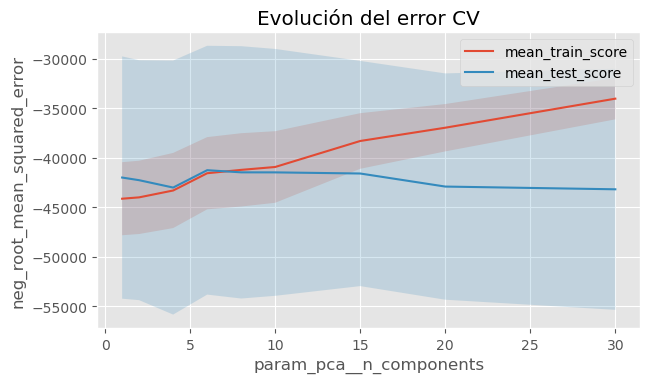

In [52]:
# Cross-validation results graph for each hyperparameter
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

results.plot('param_pca__n_components', 'mean_train_score', ax=ax)
results.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_train_score'] + results['std_train_score'],
                results['mean_train_score'] - results['std_train_score'],
                alpha=0.2)
ax.fill_between(results.param_pca__n_components.astype(np.float),
                results['mean_test_score'] + results['std_test_score'],
                results['mean_test_score'] - results['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [53]:
# Best hyperparameters by cross-validation
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 6} : -41246.664112755796 neg_root_mean_squared_error


In [54]:
# Training regression model preceded by PCA with scaling
# ==============================================================================
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=6), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6)),
                ('linearregression', LinearRegression())])

In [55]:
# Test predictions
# ==============================================================================
predictions = model.predict(X = X_test)
predictions = predictions.flatten()

# Model test error
# ==============================================================================
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predictions,
            squared = False
           )
print(f"Model test error (rmse): {rmse_ols}")

Model test error (rmse): 55562.33853365057
